## Conditioning on a collider
Movie star example: In 2009, Megan Fox voted worst actress but most attractive. Are attractiveness and talent negatively correlated in the world? Assume talent and beauty are independent but each causes one to become a movie star. What is the correlation between talent and beauty for a sample of movie stars compared to the population as a whole (stars and non-stars)?

In [13]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pyplot import scatter

In [10]:
def numpy_describe(data):
    return{
        'count': data.shape[0],
        'mean': data.mean(),
        'std': data.std(),
        'min': data.min(),
        '25%': np.percentile(data, 25),
        '50%': np.percentile(data, 50),
        '75%': np.percentile(data, 75),
        'max': data.max(),
        'var': data.var()

    }

In [3]:
np.random.seed(0)
n = 5000    # number of people who audition for a role in Steven Spielberg movie
# each is scored on talent and beauty
# beauty is independent of talent and vice versa meaning reg talent ~ beauty, the coefficient of beauty would be zero

In [4]:
beauty = np.random.normal(size=n)
talent = np.random.normal(size=n)

In [11]:
numpy_describe(beauty)

{'count': 5000,
 'mean': -0.014726047025784061,
 'std': 0.9853368197803293,
 'min': -3.740100637951779,
 '25%': -0.6923646094944962,
 '50%': -0.02189057246730272,
 '75%': 0.6500526083811559,
 'max': 3.8016602149671153,
 'var': 0.9708886484148131}

In [12]:
numpy_describe(talent)

{'count': 5000,
 'mean': -0.022141393290747588,
 'std': 0.9897574493787183,
 'min': -3.1262014778425167,
 '25%': -0.6867898713403604,
 '50%': -0.03095875648593684,
 '75%': 0.6409258780878397,
 'max': 3.292694321715965,
 'var': 0.9796198086006661}

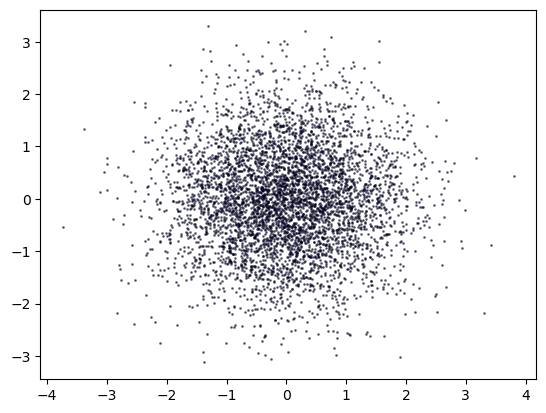

In [18]:
plt.scatter(beauty, talent, c='b', s=1, alpha=0.5, edgecolors='k')
plt.show()


In [19]:
print((sm.OLS(beauty, talent).fit()).summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.000
Method:                 Least Squares   F-statistic:                            0.01675
Date:                Tue, 15 Oct 2024   Prob (F-statistic):                       0.897
Time:                        14:26:43   Log-Likelihood:                         -7021.4
No. Observations:                5000   AIC:                                  1.404e+04
Df Residuals:                    4999   BIC:                                  1.405e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

There is no correlation between beauty and talent.

Let us create a collider variable called star.

In [20]:
score = beauty + talent
s85 = np.percentile(score, 85)
star = (score>=s85).astype(int)

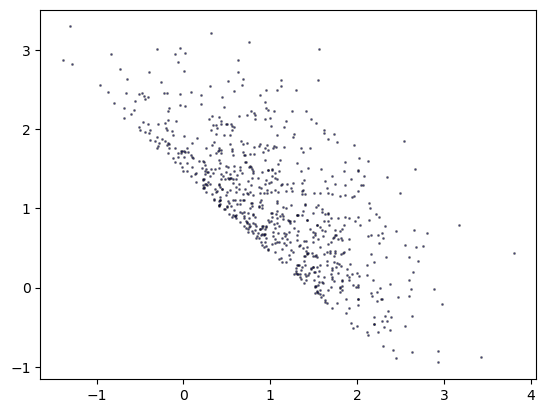

In [23]:
plt.scatter(beauty[star==1], talent[star==1], c='b', s=1, alpha=0.5, edgecolors='k')
plt.show()

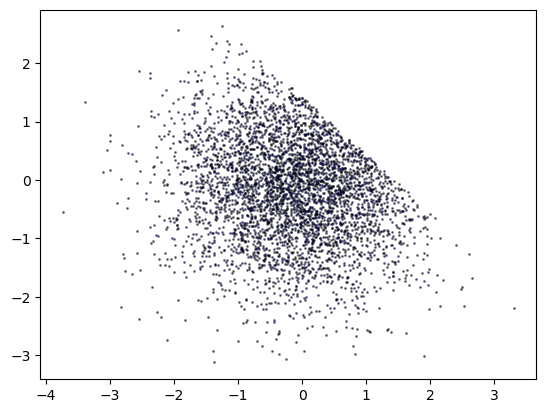

In [24]:
plt.scatter(beauty[star==0], talent[star==0], c='b', s=1, alpha=0.5, edgecolors='k')
plt.show()

In [25]:
print((sm.OLS(beauty[star==0], talent[star==0]).fit()).summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.021
Model:                            OLS   Adj. R-squared (uncentered):              0.021
Method:                 Least Squares   F-statistic:                              90.76
Date:                Tue, 15 Oct 2024   Prob (F-statistic):                    2.65e-21
Time:                        14:36:57   Log-Likelihood:                         -5610.1
No. Observations:                4250   AIC:                                  1.122e+04
Df Residuals:                    4249   BIC:                                  1.123e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [26]:
print((sm.OLS(beauty[star==1], talent[star==1]).fit()).summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.159
Model:                            OLS   Adj. R-squared (uncentered):              0.157
Method:                 Least Squares   F-statistic:                              141.2
Date:                Tue, 15 Oct 2024   Prob (F-statistic):                    5.91e-30
Time:                        14:37:15   Log-Likelihood:                         -1203.9
No. Observations:                 750   AIC:                                      2410.
Df Residuals:                     749   BIC:                                      2414.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In this case, star is a collider. Talent -> Movie Star <- Beauty. Even controlling for a collider creates problems.

In [38]:
X = np.column_stack((talent, star))

X = sm.add_constant(X)

# Fit the model
model = sm.OLS(beauty, X).fit()

# Print the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     899.9
Date:                Tue, 15 Oct 2024   Prob (F-statistic):               0.00
Time:                        14:53:34   Log-Likelihood:                -6251.8
No. Observations:                5000   AIC:                         1.251e+04
Df Residuals:                    4997   BIC:                         1.253e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2617      0.013    -19.682      0.0